In [1]:
## Dataset : Dry Bean Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the dataset
df = pd.read_excel("DryBeanDataset/Dry_Bean_Dataset.xlsx")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


<AxesSubplot:xlabel='Class', ylabel='count'>

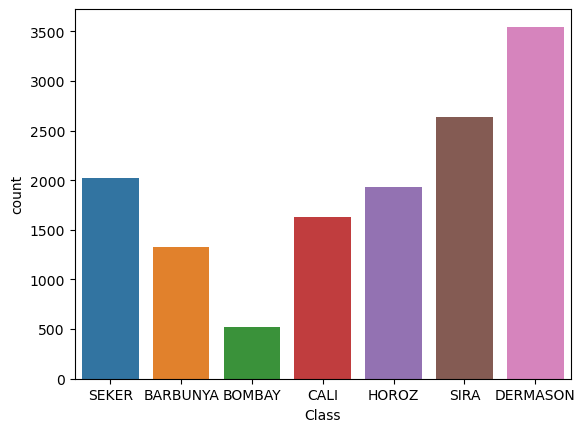

In [3]:
## Visualizing the dataset using catplot show distribution of each class
sns.countplot(x='Class', data=df)

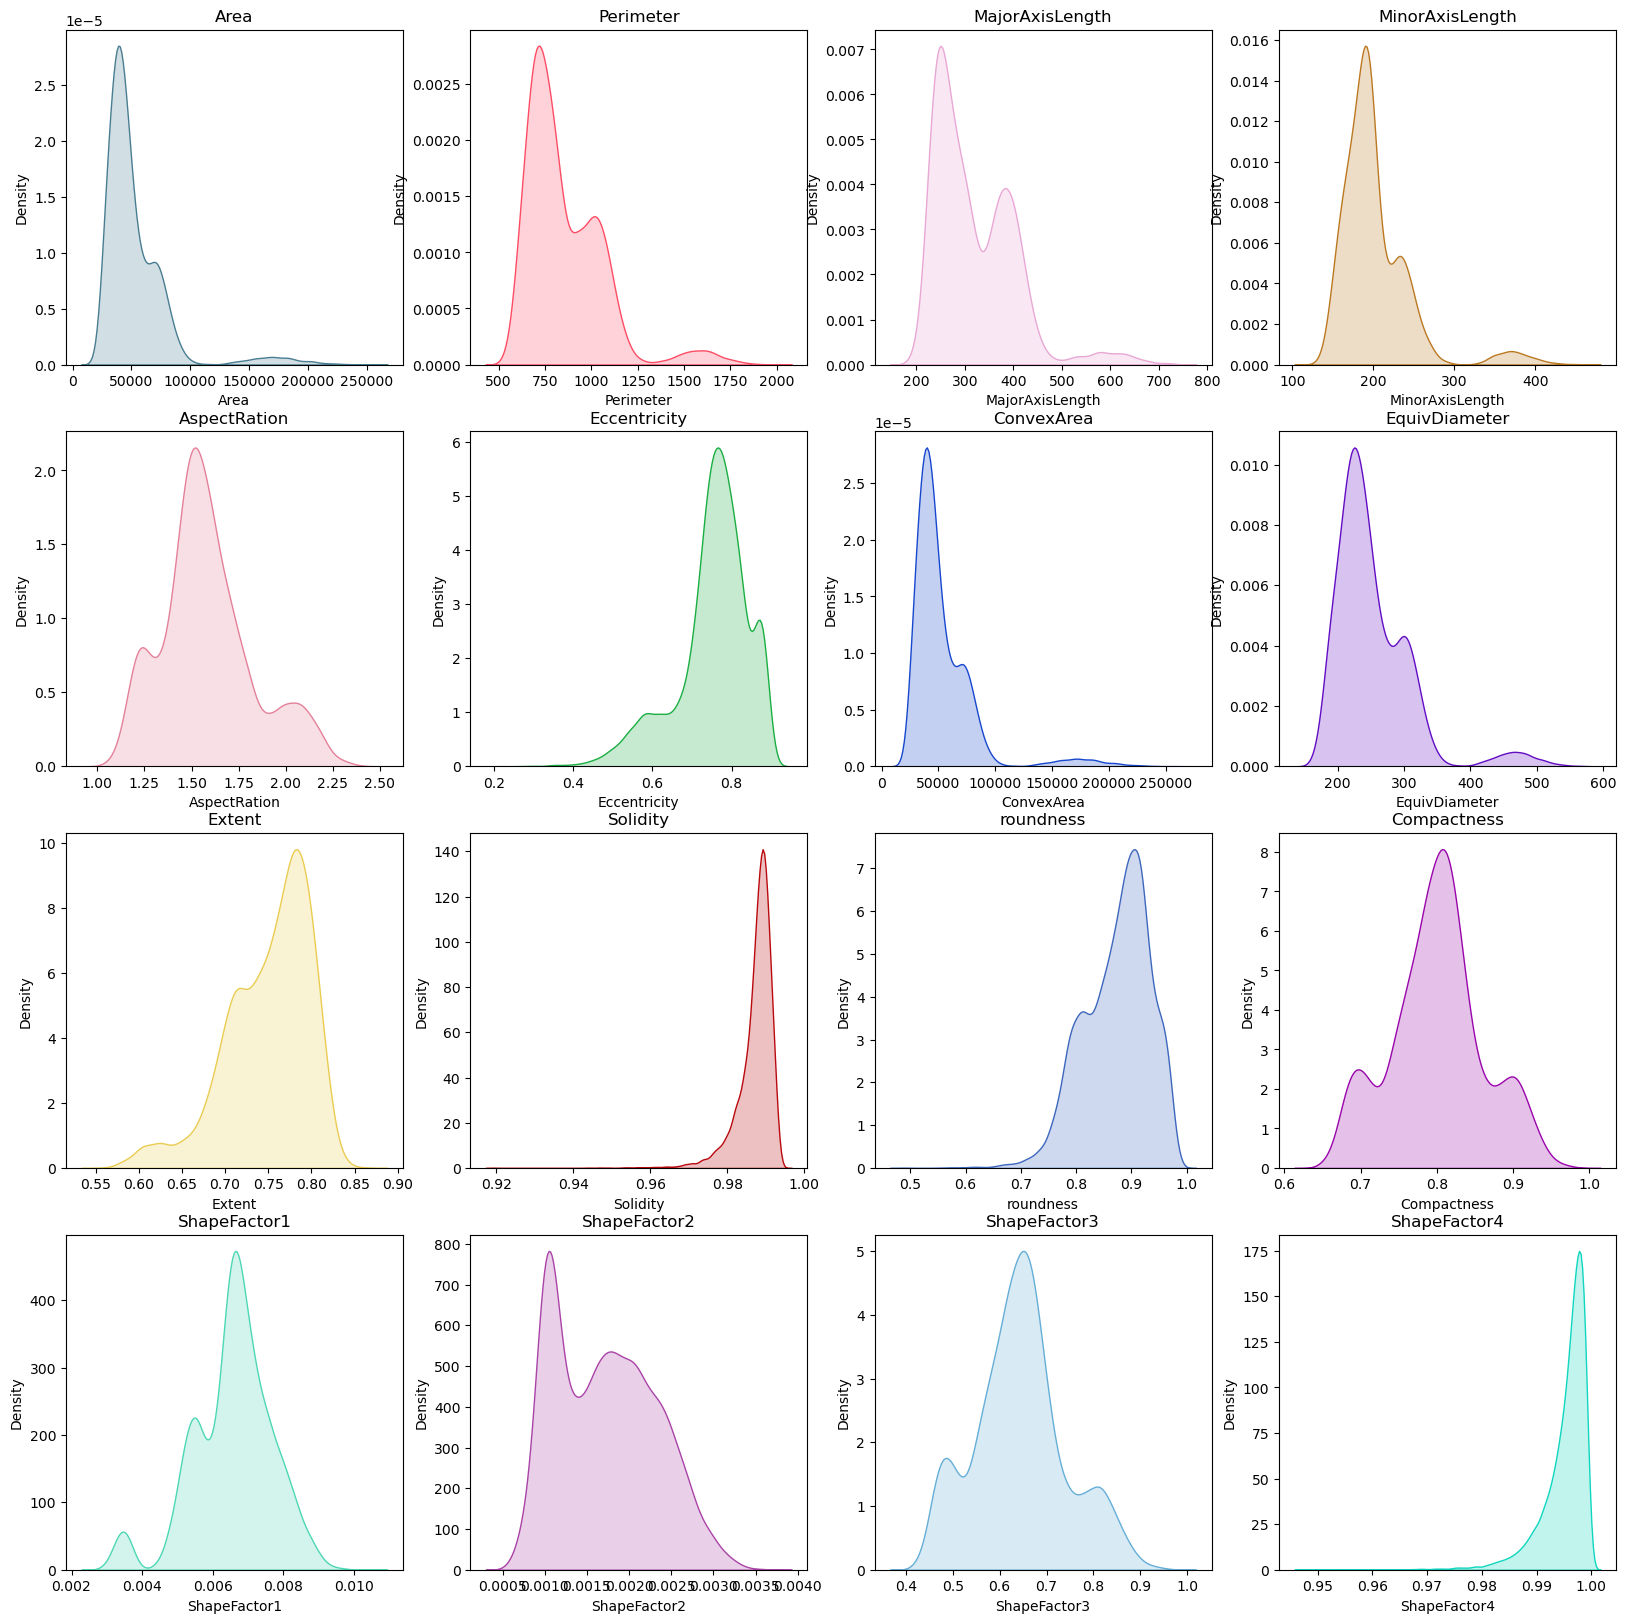

In [4]:
# Splitting the dataset into the Training set and Test set
import random
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    # Create histogram for each column kde only and different random color
    sns.kdeplot(df[df.columns[i]], ax=ax, color=(random.random(), random.random(), random.random()), shade=True)
    ax.set_title(df.columns[i])

The plots show that the data is not normalized

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Class', axis=1))
y = df['Class']

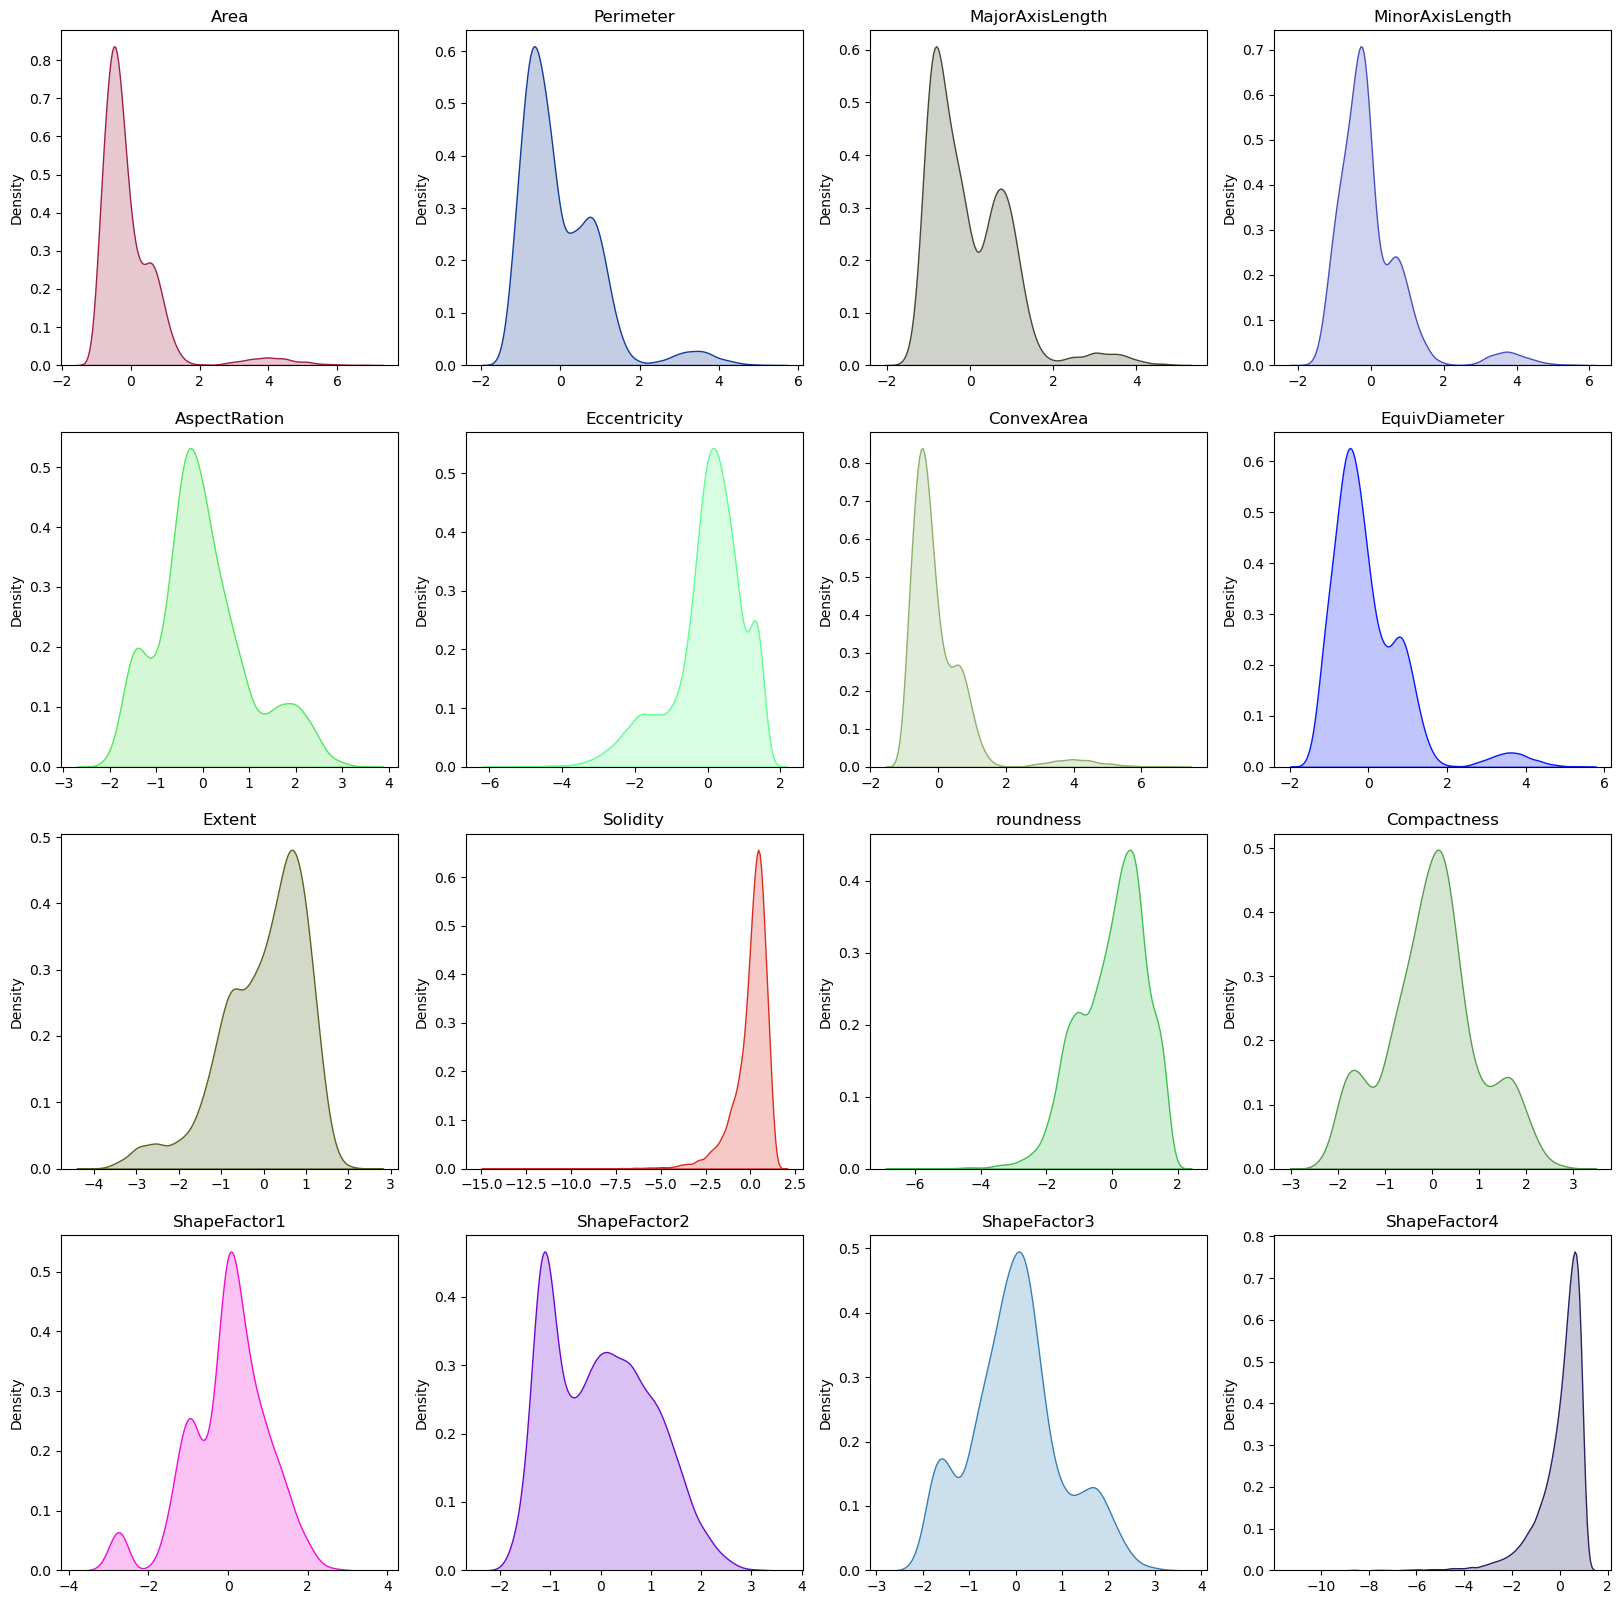

In [6]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    # Create histogram for each column kde only and different random color
    sns.kdeplot(X[:,i], ax=ax, color=(random.random(), random.random(), random.random()), shade=True)
    ax.set_title(df.columns[i])

In [7]:
# Create 10 samples of the splitted dataset with 70% training and 30% test
samples = []
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    samples.append((X_train, X_test, y_train, y_test))

In [16]:
# Use SVM to train the model
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best kernel', 'Best Nu', 'Best Epsilon'])


def fitnessFunction(kernel, C, gamma):
    classifer = SVC(kernel=kernel, C=C, gamma=gamma,max_iter=1000)
    classifer.fit(X_train, y_train)
    return classifer.score(X_test, y_test)
    

for i in range(len(samples)):
    best_score = 0
    best_C = 0
    best_gamma = 0
    learningCurves = []
    for kernel in kernels:
        print('Sample : ', i, 'Kernel : ', kernel)
        X_train, X_test, y_train, y_test = samples[i]
        C = np.random.uniform(0.1, 10)
        # Randomly choose gamma
        gamma = np.random.uniform(0.1, 10)
        score = fitnessFunction(kernel, C, gamma)
        if score > best_score:
            best_score = round(score, 2)
            best_C = round(C, 2)
            best_gamma = round(gamma, 2)
            best_kernel = kernel
    print('Best Accuracy : ', best_score, 'Best kernel : ', best_kernel, 'Best Nu : ', best_C, 'Best Epsilon : ', best_gamma)
    result.loc[i] = [i, best_score, best_kernel, best_C, best_gamma]

Sample :  0 Kernel :  linear
Sample :  0 Kernel :  poly
Sample :  0 Kernel :  rbf
Sample :  0 Kernel :  sigmoid
Best Accuracy :  0.9 Best kernel :  linear Best Nu :  9.94 Best Epsilon :  7.29
Sample :  1 Kernel :  linear
Sample :  1 Kernel :  poly
Sample :  1 Kernel :  rbf
Sample :  1 Kernel :  sigmoid
Best Accuracy :  0.92 Best kernel :  linear Best Nu :  0.62 Best Epsilon :  7.66
Sample :  2 Kernel :  linear
Sample :  2 Kernel :  poly
Sample :  2 Kernel :  rbf
Sample :  2 Kernel :  sigmoid
Best Accuracy :  0.91 Best kernel :  linear Best Nu :  5.59 Best Epsilon :  2.79
Sample :  3 Kernel :  linear
Sample :  3 Kernel :  poly
Sample :  3 Kernel :  rbf
Sample :  3 Kernel :  sigmoid
Best Accuracy :  0.76 Best kernel :  rbf Best Nu :  8.47 Best Epsilon :  8.85
Sample :  4 Kernel :  linear
Sample :  4 Kernel :  poly
Sample :  4 Kernel :  rbf
Sample :  4 Kernel :  sigmoid
Best Accuracy :  0.92 Best kernel :  linear Best Nu :  1.28 Best Epsilon :  0.23
Sample :  5 Kernel :  linear
Sample :  

In [19]:
print(result.to_markdown(showindex=False))

|   Sample |   Best Accuracy | Best kernel   |   Best Nu |   Best Epsilon |
|---------:|----------------:|:--------------|----------:|---------------:|
|        0 |            0.9  | linear        |      9.94 |           7.29 |
|        1 |            0.92 | linear        |      0.62 |           7.66 |
|        2 |            0.91 | linear        |      5.59 |           2.79 |
|        3 |            0.76 | rbf           |      8.47 |           8.85 |
|        4 |            0.92 | linear        |      1.28 |           0.23 |
|        5 |            0.93 | linear        |      0.28 |           5.2  |
|        6 |            0.91 | linear        |      4.72 |           1.6  |
|        7 |            0.91 | linear        |      4.21 |           4.94 |
|        8 |            0.85 | linear        |      9.17 |           7.65 |
|        9 |            0.92 | linear        |      2.01 |           1.21 |


In [31]:
# Create convergence plot for best accuracy
from sklearn.model_selection import learning_curve

# Select sample with best accuracy
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

# Create learning curve for best kernel
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best kernel'].iloc[result['Best Accuracy'].idxmax()], C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()], gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()], max_iter=1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

/home/rk/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/rk/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/rk/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/rk/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/rk/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminat

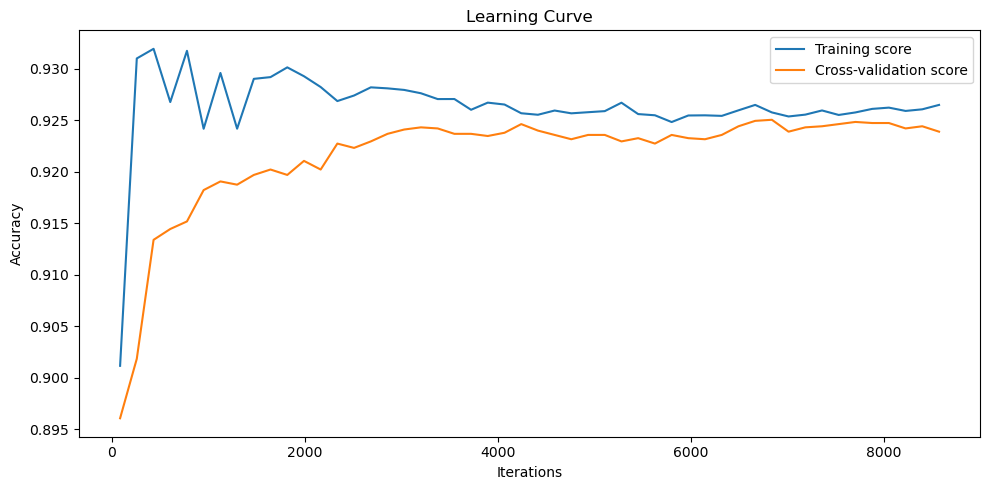

In [38]:
# Plot learning curve wrt iterations
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
# Set range of X axis to 1000
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.tight_layout()
plt.show()